Importing all the libraries

In [4]:
import pandas as pd
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')
import re

# !pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from IPython.core.display import Path

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bgane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bgane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bgane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bgane\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bgane\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Getting all the data


In [5]:

path = 'imdb-reviews.csv'
jsonpath = 'save.json'

df = pd.read_csv(path,  sep='\t', lineterminator='\n')



Data Processing


In [6]:

df['review'] = df['review'].apply(lambda r: re.sub(r'\'', '', r))   #removing apostrophes so don't becomes dont
df['review'] = [r.lower() for r in df['review'] ]   #making everything lowercase
df['review'] = df['review'].apply(lambda r: re.sub(r'<br /><br />', ' ', r))  #removing this wierd sequence found in some reviews
df['review'] = df['review'].apply(lambda r: re.sub(r'[^a-z]', ' ', r))   #only keeping letters


# Stemming
stemmer = PorterStemmer()

def stemming(text):
  tokens = text.split()
  ret = []
  for token in tokens:
    ret.append(stemmer.stem(token))
  return ' '.join(ret)

df['review'] = df['review'].apply(stemming)

# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
  tokens = text.split()
  ret = []
  for token in tokens:
    ret.append(lemmatizer.lemmatize(token))
  return ' '.join(ret)

df['review'] = df['review'].apply(lemmatization)

df.to_json(jsonpath)  #saving processed data as to not repeat this time consuming step

Vectorisation of the data

In [7]:
df = pd.read_json(jsonpath)  #loading processed data
 

Y = list(df['rating'].apply(lambda r: 1 if r > 5 else 0))


vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=1.0, min_df=1, norm='l1')
X = vectorizer.fit_transform(df['review'])


Logistic regression Parameters Tuning

In [ ]:
# TESTING LOGISTIC REGRESSION TOLLERANCE

for t in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]:
  model = LogisticRegression(tol=t, C=1.0, random_state=420, max_iter=500, multi_class='multinomial', n_jobs=-1)
  scores = cross_val_score(model,X, Y, cv=5, n_jobs=-1 )
  print(f"for tollerance = {t}")
  print(scores.mean())

for tollerance = 0.1
0.8254977198835519
for tollerance = 0.01
0.8254977174152389
for tollerance = 0.001
0.8254977174152389
for tollerance = 0.0001
0.8254977174152389
for tollerance = 1e-05
0.8254977174152389
for tollerance = 1e-06
0.8254977174152389
for tollerance = 1e-07
0.8254977174152389
for tollerance = 1e-08
0.8254977174152389
for tollerance = 1e-09
0.8254977174152389


In [ ]:
# TESTING LOGISTIC REGRESSION INVERSE OF REGULARISATION STRENGTH

for c in [x * 0.1 for x in range(80, 100, 4)]:
  model = LogisticRegression(C=c, random_state=420, max_iter=500, multi_class='multinomial', n_jobs=-1)
  scores = cross_val_score(model,X, Y, cv=5, n_jobs=-1 )
  print(f"for  Inverse of regularization strength = {c}")
  print(scores.mean())

for  Inverse of regularization strength = 0.2
0.8144330034572919

for  Inverse of regularization strength = 0.4
0.8182767542108987

....

for  Inverse of regularization strength = 1.8
0.83320746089063

for  Inverse of regularization strength = 2.0
0.8351849103339649

for  Inverse of regularization strength = 2.2
0.8365402190247642

for  Inverse of regularization strength = 2.4000000000000004
0.8382288042694706

............

for  Inverse of regularization strength = 3.8000000000000003
0.8462940687352594

for  Inverse of regularization strength = 4.0
0.8474494095190638

.....

for  Inverse of regularization strength = 5.0
0.8521152121610029

for  Inverse of regularization strength = 5.2
0.8530483800943296

for  Inverse of regularization strength = 5.4
0.8536927085121576

......


for  Inverse of regularization strength = 8.4
0.8627355162418573

for  Inverse of regularization strength = 8.8
0.8636020249151016

for  Inverse of regularization strength = 9.200000000000001
0.8645129805000067

for  Inverse of regularization strength = 9.600000000000001
0.8655350249784632



In [ ]:
# TESTING LOGISTIC REGRESSION PENALTY PARAMETER

for p in ['l1', 'l2', 'elasticnet', 'none']:
  model = LogisticRegression(penalty=p, random_state=420, max_iter=500, multi_class='multinomial', n_jobs=-1)
  scores = cross_val_score(model,X, Y, cv=5, n_jobs=-1 )
  print(f"for  penalty = {p}")
  print(scores.mean())

for  penalty = l1
nan

for  penalty = l2
0.8254977174152389

for  penalty = elasticnet
nan

for  penalty = none
0.910016061065668
tho it took really long to complete


In [ ]:
# TESTING LOGISTIC REGRESSION SOLVER PARAMETER

for sol in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
  model = LogisticRegression(penalty='l2',tol=0.1, C=10, random_state=420, solver=sol, max_iter=10000, multi_class='multinomial', n_jobs=-1)
  scores = cross_val_score(model,X, Y, cv=5, n_jobs=-1 )
  print(f"for  solver = {sol}")
  print(scores.mean())

for  solver = newton-cg
0.8660016027743442


for  solver = lbfgs
0.8660682546294878

for  solver = liblinear
nan

for  solver = sag
0.858358562988669

for  solver = saga
0.826807394404152


The newton solver was fairly quick compared to lbfgs and almost as good. 

In [ ]:
# TESTING LOGISTIC REGRESSION MULTI CLASS PARAMETER
for clas in ['auto', 'ovr', 'multinomial']:
  model = LogisticRegression(penalty='l2',tol=0.1, C=10, random_state=420, solver='lbfgs', max_iter=10000, multi_class=clas , n_jobs=-1)
  scores = cross_val_score(model,X, Y, cv=5, n_jobs=-1 )
  print(f"for  clas = {clas}")
  print(scores.mean())

for  clas = auto
0.8521596491994113

for  clas = ovr
0.8521596491994113

for  clas = multinomial
0.8660682546294878


In [ ]:
# TESTING LOGISTIC REGRESSION MAX ITERRATIONS

for iter in [10,100,1000,10000,100000,1000000]:
  model = LogisticRegression(penalty='l2',tol=0.1, C=10, random_state=420, solver='lbfgs', max_iter=iter, multi_class='multinomial' , n_jobs=-1)
  scores = cross_val_score(model,X, Y, cv=5, n_jobs=-1 )
  print(f"for  iterrations = {iter}")
  print(scores.mean())

for  iterrations = 10
0.8627134050942672
for  iterrations = 100
0.8660682546294878
for  iterrations = 1000
0.8660682546294878
for  iterrations = 10000
0.8660682546294878
for  iterrations = 100000
0.8660682546294878
for  iterrations = 1000000
0.8660682546294878


In [ ]:
# TESTING VECTORIZER PARAMETERS

for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
  for j in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    if j < i:
      vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=i, min_df=j, norm='l1')
      X = vectorizer.fit_transform(df['review'])
      model = LogisticRegression(penalty='l2',tol=0.1, C=10, random_state=420, solver='lbfgs', max_iter=1000, multi_class='multinomial' , n_jobs=-1)
      scores = cross_val_score(model,X, Y, cv=5, n_jobs=-1 )
      print(f"for  max  = {i} and min = {j}")
      print(scores.mean())

for  max  = 0.2 and min = 0.1
0.7356470130784303
for  max  = 0.3 and min = 0.1
0.7776172713387569
for  max  = 0.3 and min = 0.2
0.70949612327999
for  max  = 0.4 and min = 0.1
0.7881488222901298
for  max  = 0.4 and min = 0.2
0.737979990917102
for  max  = 0.4 and min = 0.3
0.6385086122278102
for  max  = 0.5 and min = 0.1
0.790281805070364
for  max  = 0.5 and min = 0.2
0.7440232973200711
for  max  = 0.5 and min = 0.3
0.6621266402032251
for  max  = 0.5 and min = 0.4
0.5916060475741161
for  max  = 0.6 and min = 0.1
0.7906150964341492
for  max  = 0.6 and min = 0.2
0.747466991312353
for  max  = 0.6 and min = 0.3
0.6689254157521465
for  max  = 0.6 and min = 0.4
0.6061588012351734
for  max  = 0.6 and min = 0.5
0.5541236512736829
for  max  = 0.7 and min = 0.1
0.7907928445877832
for  max  = 0.7 and min = 0.2
0.747311507341713
for  max  = 0.7 and min = 0.3
0.6726357887460775
for  max  = 0.7 and min = 0.4
0.6131797397613206
for  max  = 0.7 and min = 0.5
0.5771196594438975
for  max  = 0.7 and min = 

In [5]:
for i in [1,2]:

  vectorizer = TfidfVectorizer(ngram_range=(1, i),norm='l1')
  X = vectorizer.fit_transform(df['review'])
  model = LogisticRegression(penalty='l2',tol=0.1, C=10, random_state=420, solver='lbfgs', max_iter=1000, multi_class='multinomial' , n_jobs=-1)
  scores = cross_val_score(model,X, Y, cv=5, n_jobs=-1 )
  print(f"for  ngram range = (1, {i})")
  print(scores.mean())

for  ngram range = (1, 1)
0.8838650330417014


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


for  ngram range = (1, 2)
0.8660682546294878


Testing Logistic Regression with a Validation set

In [8]:
# SCORES

df = pd.read_json(jsonpath)

Y = list(df['rating'].apply(lambda r: 1 if r > 5 else 0))

vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_df=1.0, min_df=1, norm='l1')
X = vectorizer.fit_transform(df['review'])

Xtrain, Xval , Ytrain, Yval = train_test_split(X, Y, test_size=0.1, random_state=69)


model = LogisticRegression(penalty='l2', tol=0.1, C=10.0, random_state=420, solver='lbfgs', max_iter=1000, multi_class='multinomial', n_jobs=-1).fit(Xtrain, Ytrain)

prediction = model.predict(Xval)
print(classification_report(Yval, prediction))


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2222
           1       0.88      0.89      0.89      2279

    accuracy                           0.89      4501
   macro avg       0.89      0.89      0.89      4501
weighted avg       0.89      0.89      0.89      4501



100
5100
10100
15100
20100
25100
30100
35100
40506


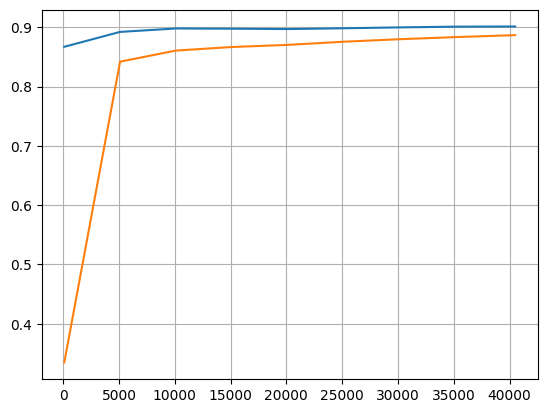

In [9]:
# LEARNING CURVE
df = pd.read_json(jsonpath)


Y = list(df['rating'].apply(lambda r: 1 if r > 5 else 0))

vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_df=1.0, min_df=1, norm='l1')
X = vectorizer.fit_transform(df['review'])

Xtrain, Xval , Ytrain, Yval = train_test_split(X, Y, test_size=0.1, random_state=69)

model = LogisticRegression(penalty='l2', tol=0.1, C=10.0, random_state=420, solver='lbfgs', max_iter=1000, multi_class='multinomial', n_jobs=-1)

# print(Xtrain.shape[0])
Tscores = []
Vscores = []
for size in [100, 5100, 10100, 15100, 20100, 25100, 30100,35100,40506]:
  print(size)
  model.fit(Xtrain[:size], Ytrain[:size])
  Ptrain = model.predict(Xtrain[:size])
  Tscores += [f1_score(Ytrain[:size], Ptrain, average="weighted") ]
  Pval = model.predict(Xval)
  Vscores += [f1_score(Yval, Pval, average="weighted") ]

plt.grid()
plt.plot([100, 5100, 10100, 15100, 20100, 25100, 30100,35100,40506], Tscores, label="Train Score")
plt.plot([100, 5100, 10100, 15100, 20100, 25100, 30100,35100,40506], Vscores, label="Validation Score")
plt.show()

Test Set

In [ ]:

# Test data , add path
path =  None #add path of test data

df = pd.read_csv(path,  sep='\t', lineterminator='\n')

df['review'] = df['review'].apply(lambda r: re.sub(r'\'', '', r))   #removing apostrophes so don't becomes dont
df['review'] = [r.lower() for r in df['review'] ]   #making everything lowercase
df['review'] = df['review'].apply(lambda r: re.sub(r'<br /><br />', ' ', r))  #removing this wierd sequence found in some reviews
df['review'] = df['review'].apply(lambda r: re.sub(r'[^a-z]', ' ', r))   #only keeping letters


# Stemming
stemmer = PorterStemmer()

def stemming(text):
  tokens = text.split()
  ret = []
  for token in tokens:
    ret.append(stemmer.stem(token))
  return ' '.join(ret)

df['review'] = df['review'].apply(stemming)

# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
  tokens = text.split()
  ret = []
  for token in tokens:
    ret.append(lemmatizer.lemmatize(token))
  return ' '.join(ret)

df['review'] = df['review'].apply(lemmatization)

YTest = list(df['rating'].apply(lambda r: 1 if r > 5 else 0))
vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_df=1.0, min_df=1, norm='l1')
XTest = vectorizer.fit_transform(df['review'])


#Train data
df = pd.read_json(jsonpath)   #change path to current save.json


Y = list(df['rating'].apply(lambda r: 1 if r > 5 else 0))

vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_df=1.0, min_df=1, norm='l1')
X = vectorizer.fit_transform(df['review'])
model = LogisticRegression(penalty='l2',tol=0.1, C=10, random_state=420, solver='lbfgs', max_iter=1000, multi_class='multinomial' , n_jobs=-1).fit(X,Y)
prediction = model.predict(XTest)
print(classification_report(YTest, prediction))

Sources used for this assignment

https://machinelearningmastery.com/prepare-movie-review-data-sentiment-analysis/

https://towardsdatascience.com/sentiment-analysis-with-text-mining-13dd2b33de27

https://www.analyticsvidhya.com/blog/2021/08/text-preprocessing-techniques-for-performing-sentiment-analysis/

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

https://www.tutorialspoint.com/python_data_science/python_stemming_and_lemmatization.htm

https://colab.research.google.com/github/gal-a/blog/blob/master/docs/notebooks/nlp/nltk_preprocess.ipynb#scrollTo=6CqM0UVkebx5

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://www.researchgate.net/publication/254051455_L1_vs_L2_Regularization_in_Text_Classification_when_Learning_from_Labeled_Features

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://en.wikipedia.org/wiki/Cross-validation_(statistics)

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

https://thedatascientist.com/learning-curves-scikit-learn/


from a quick count we see that positive and negatice reviews are about half each